In [83]:
import pandas as pd
import numpy as np
import scipy.stats as sp
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from sklearn.datasets.species_distributions import construct_grids
from sklearn.datasets import fetch_species_distributions




ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

In [50]:
dt = pd.read_csv("globalterrorismd.csv", encoding ='latin1')
dt.head()

C:\Users\Luigi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (4,6,31,33,53,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [51]:
dt.region_txt.value_counts()

Middle East & North Africa     46511
South Asia                     41497
South America                  18762
Western Europe                 16307
Sub-Saharan Africa             15491
Southeast Asia                 11453
Central America & Caribbean    10340
Eastern Europe                  5031
North America                   3346
East Asia                        794
Central Asia                     554
Australasia & Oceania            264
Name: region_txt, dtype: int64

In [104]:
dt = dt.loc[:, ['iyear','imonth','iday','country','gname',
'country_txt',
'region_txt',
'region',
'provstate',
'city',
'latitude',
'longitude',
'success',
'attacktype1',
'attacktype1_txt','targtype1',
'targtype1_txt','targsubtype1',
'targsubtype1_txt',
 'guncertain1',
 'guncertain2',
 'guncertain3',
 'individual',
 'weaptype1',
 'weaptype1_txt',
 'weapsubtype1',
 'weapsubtype1_txt',
 'weaptype2',
 'weaptype2_txt',
 'weapsubtype2',
 'weapsubtype2_txt',
 'weaptype3',
 'weaptype3_txt',
 'weapsubtype3',
 'weapsubtype3_txt',
 'weapdetail',
 'nkill',
 'nwound',
 'property',
 'propextent',
 'propextent_txt',
 'propvalue',
 'ishostkid',
 'nhostkid',
 'nhostkidus',
 'kidhijcountry']]
dt= dt[(dt.region_txt =="Middle East & North Africa")|(dt.region_txt=="Eastern Europe")|(dt.region_txt=="Western Europe")]
dt = dt[(dt.nwound > 0) | (dt.nkill > 0)]
dt.nwound = dt.nwound.fillna(0)

In [105]:
dt.head()

,iyear,imonth,iday,country,gname,country_txt,region_txt,region,provstate,city,...,nkill,nwound,property,propextent,propextent_txt,propvalue,ishostkid,nhostkid,nhostkidus,kidhijcountry
59,1970,2,10,362,Popular Front for the Liberation of Palestine ...,West Germany (FRG),Western Europe,8,Bavaria,Munich,...,1.0,0.0,1,3.0,Minor (likely < $1 million),60000.0,0.0,NaN,NaN,NaN
62,1970,2,13,362,Popular Front for the Liberation of Palestine ...,West Germany (FRG),Western Europe,8,Bavaria,Munich,...,7.0,9.0,1,3.0,Minor (likely < $1 million),60000.0,0.0,NaN,NaN,NaN
80,1970,2,21,199,"Popular Front for the Liberation of Palestine,...",Switzerland,Western Europe,8,Zurich,Zurich,...,47.0,0.0,1,2.0,Major (likely > $1 million but < $1 billion),3000000.0,0.0,NaN,NaN,NaN
133,1970,3,14,60,Unknown,Egypt,Middle East & North Africa,10,NaN,Alexandria,...,0.0,2.0,1,4.0,Unknown,NaN,0.0,NaN,NaN,NaN
171,1970,4,3,96,Saor Eire (Irish Republican Group),Ireland,Western Europe,8,Dublin,Dublin,...,1.0,0.0,1,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [99]:

dt_location = dt.loc[: ,['country_txt','latitude','longitude','nkill','nwound']]
dt_location.head()

,country_txt,latitude,longitude,nkill,nwound
59,West Germany (FRG),48.139126,11.580186,1.0,0.0
62,West Germany (FRG),48.139126,11.580186,7.0,9.0
80,Switzerland,47.368650,8.539182,47.0,0.0
133,Egypt,31.198056,29.919167,0.0,2.0
171,Ireland,53.344104,-6.267494,1.0,0.0


In [100]:
m = Basemap(projection="cyl",
           llcrnrlat=13.00,
           llcrnrlon=-19.66,
           urcrnrlat=69.71,
           urcrnrlon = 72.61,
           resolution='l')
#Coordenadas em latitude e longitude
coordenadas = {
    "IRAQUE" : [33.3,43.35],
    "Portugal": [38.4,9.8],
    "Espanha" : [41.23,2.9],
    "Franca" : [48.51,2.20],
    "Italia" : [43.76,11.25]
}
IRAQlat,IRAQlon = 33.3,43.55
xpt,ypt = m(IRAQlon,IRAQlat)
m.plot(xpt,ypt,'co',markersize=30)
m.drawcoastlines()
m.drawcountries(linewidth=2)
plt.show()

NameError: name 'Basemap' is not defined

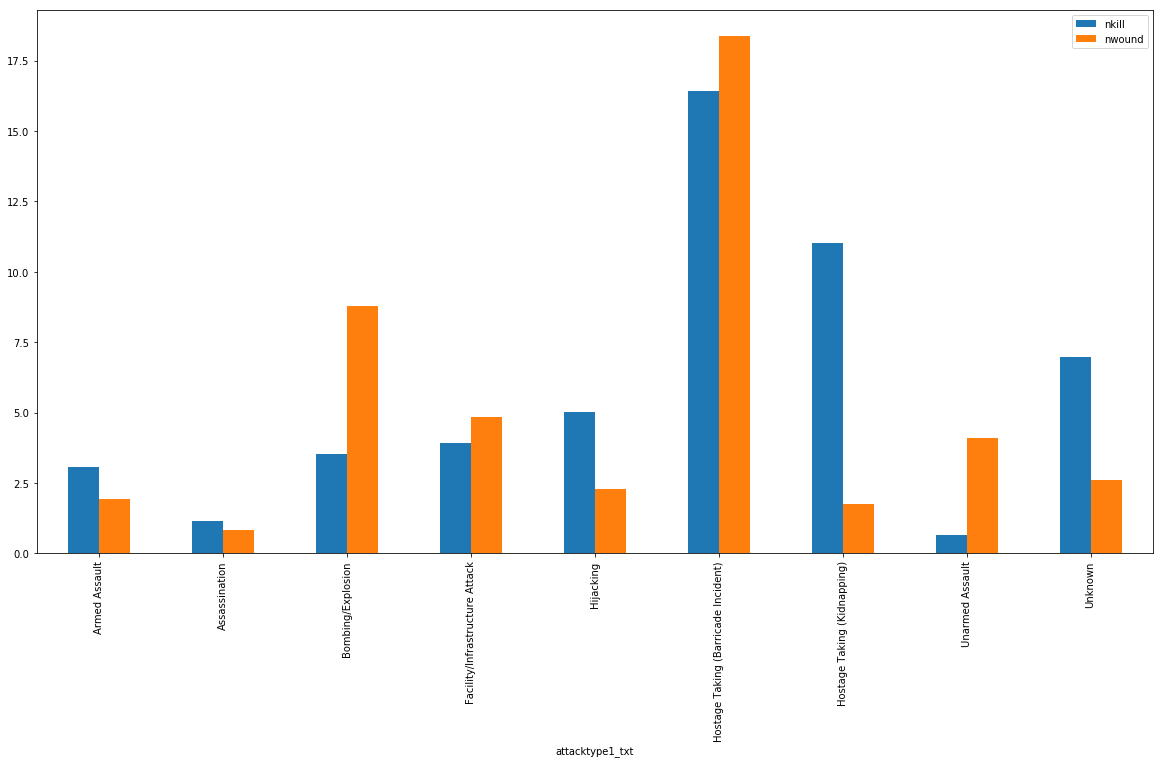

In [102]:

dt_attack = dt.loc[:,['attacktype1_txt','nkill','nwound']]
dt_attack.nkill.groupby(dt.attacktype1_txt).mean()
dt_attack2 = pd.DataFrame(dt_attack.groupby(dt.attacktype1_txt).mean())
dt_attack2.plot(kind = 'bar', figsize = (20,10))
plt.show()


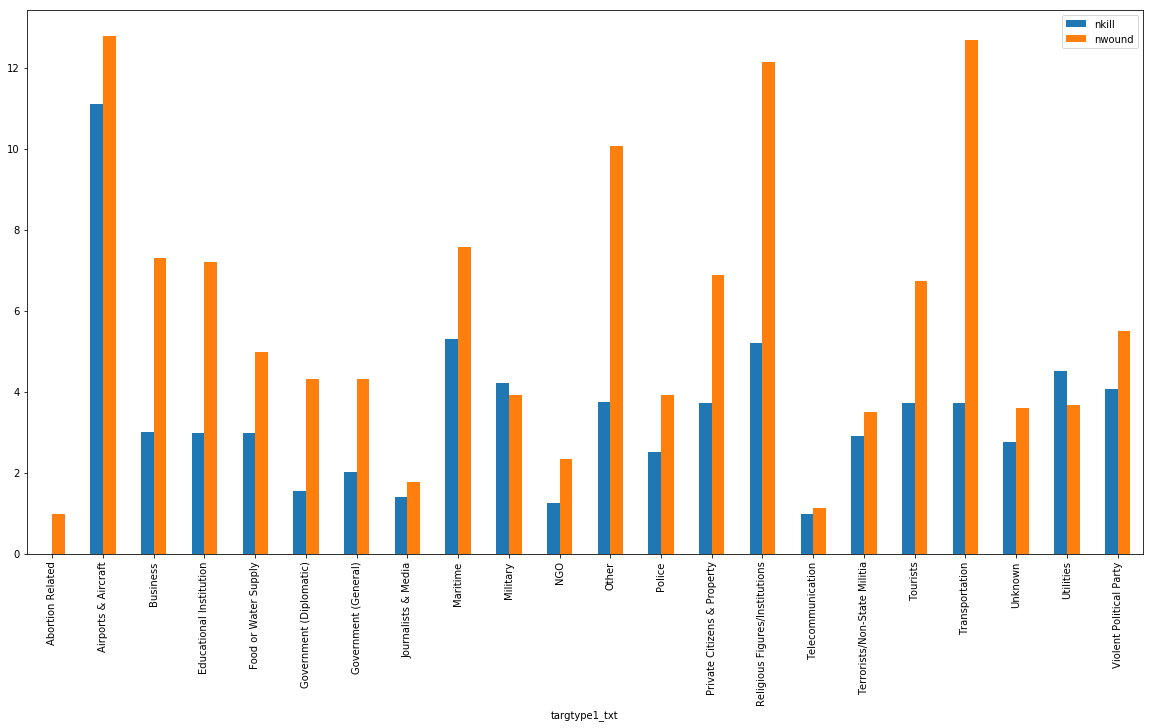

In [103]:
dt_target = dt.loc[:,['targtype1_txt','nkill','nwound']]
dt_target2 = pd.DataFrame(dt_target.groupby(dt.targtype1_txt).mean())
dt_target2.plot(kind = 'bar', figsize= (20,10))
plt.show()